In [1]:
import os
import sys

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_2_no_adjustment'

In [3]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 1.0373 - categorical cross entropy: 1.0373 - mean squared error: 0.0630 - accuracy: 0.6863 - auc: 0.7765 - prc: 0.2546

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_1\assets


251/251 [==============================] - 72s 252ms/step - loss: 1.0373 - categorical cross entropy: 1.0373 - mean squared error: 0.0630 - accuracy: 0.6863 - auc: 0.7765 - prc: 0.2546 - val_loss: 0.9964 - val_categorical cross entropy: 0.9964 - val_mean squared error: 0.0553 - val_accuracy: 0.7115 - val_auc: 0.8585 - val_prc: 0.4144 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - ETA: 0s - loss: 0.7772 - categorical cross entropy: 0.7772 - mean squared error: 0.0531 - accuracy: 0.7281 - auc: 0.8681 - prc: 0.3876

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_2\assets


251/251 [==============================] - 62s 246ms/step - loss: 0.7772 - categorical cross entropy: 0.7772 - mean squared error: 0.0531 - accuracy: 0.7281 - auc: 0.8681 - prc: 0.3876 - val_loss: 0.9771 - val_categorical cross entropy: 0.9771 - val_mean squared error: 0.0552 - val_accuracy: 0.7115 - val_auc: 0.8733 - val_prc: 0.4920 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - ETA: 0s - loss: 0.6989 - categorical cross entropy: 0.6989 - mean squared error: 0.0488 - accuracy: 0.7563 - auc: 0.8968 - prc: 0.4762

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_3\assets


251/251 [==============================] - 62s 246ms/step - loss: 0.6989 - categorical cross entropy: 0.6989 - mean squared error: 0.0488 - accuracy: 0.7563 - auc: 0.8968 - prc: 0.4762 - val_loss: 0.8625 - val_categorical cross entropy: 0.8625 - val_mean squared error: 0.0506 - val_accuracy: 0.7575 - val_auc: 0.8644 - val_prc: 0.5002 - lr: 0.0010
Epoch 4/100
251/251 [==============================] - ETA: 0s - loss: 0.6894 - categorical cross entropy: 0.6894 - mean squared error: 0.0473 - accuracy: 0.7628 - auc: 0.8990 - prc: 0.5025

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_4\assets


251/251 [==============================] - 62s 247ms/step - loss: 0.6894 - categorical cross entropy: 0.6894 - mean squared error: 0.0473 - accuracy: 0.7628 - auc: 0.8990 - prc: 0.5025 - val_loss: 0.6395 - val_categorical cross entropy: 0.6395 - val_mean squared error: 0.0442 - val_accuracy: 0.7800 - val_auc: 0.9117 - val_prc: 0.5849 - lr: 0.0010
Epoch 5/100
251/251 [==============================] - 50s 197ms/step - loss: 0.6360 - categorical cross entropy: 0.6360 - mean squared error: 0.0448 - accuracy: 0.7769 - auc: 0.9182 - prc: 0.5513 - val_loss: 0.6694 - val_categorical cross entropy: 0.6694 - val_mean squared error: 0.0473 - val_accuracy: 0.7600 - val_auc: 0.9160 - val_prc: 0.6099 - lr: 0.0010
Epoch 6/100
251/251 [==============================] - 49s 196ms/step - loss: 0.6142 - categorical cross entropy: 0.6142 - mean squared error: 0.0439 - accuracy: 0.7785 - auc: 0.9256 - prc: 0.5692 - val_loss: 0.6730 - val_categorical cross entropy: 0.6730 - val_mean squared error: 0.0421 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_11\assets


251/251 [==============================] - 62s 248ms/step - loss: 0.5372 - categorical cross entropy: 0.5372 - mean squared error: 0.0390 - accuracy: 0.8091 - auc: 0.9436 - prc: 0.6650 - val_loss: 0.5813 - val_categorical cross entropy: 0.5813 - val_mean squared error: 0.0406 - val_accuracy: 0.7955 - val_auc: 0.9357 - val_prc: 0.7227 - lr: 0.0010
Epoch 12/100
251/251 [==============================] - 50s 197ms/step - loss: 0.5193 - categorical cross entropy: 0.5193 - mean squared error: 0.0379 - accuracy: 0.8127 - auc: 0.9475 - prc: 0.6883 - val_loss: 0.5961 - val_categorical cross entropy: 0.5961 - val_mean squared error: 0.0406 - val_accuracy: 0.8040 - val_auc: 0.9220 - val_prc: 0.6590 - lr: 0.0010
Epoch 13/100
251/251 [==============================] - 50s 197ms/step - loss: 0.5043 - categorical cross entropy: 0.5043 - mean squared error: 0.0369 - accuracy: 0.8176 - auc: 0.9522 - prc: 0.7317 - val_loss: 0.6956 - val_categorical cross entropy: 0.6956 - val_mean squared error: 0.0466

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_23\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_no_adjustment_20_23\assets


251/251 [==============================] - 62s 248ms/step - loss: 0.4206 - categorical cross entropy: 0.4206 - mean squared error: 0.0316 - accuracy: 0.8454 - auc: 0.9662 - prc: 0.8069 - val_loss: 0.5353 - val_categorical cross entropy: 0.5353 - val_mean squared error: 0.0384 - val_accuracy: 0.8075 - val_auc: 0.9507 - val_prc: 0.7316 - lr: 9.5000e-04
Epoch 24/100
251/251 [==============================] - 50s 198ms/step - loss: 0.3932 - categorical cross entropy: 0.3932 - mean squared error: 0.0294 - accuracy: 0.8565 - auc: 0.9699 - prc: 0.8330 - val_loss: 0.6214 - val_categorical cross entropy: 0.6214 - val_mean squared error: 0.0414 - val_accuracy: 0.7960 - val_auc: 0.9134 - val_prc: 0.6619 - lr: 9.5000e-04
Epoch 25/100
251/251 [==============================] - 50s 198ms/step - loss: 0.3887 - categorical cross entropy: 0.3887 - mean squared error: 0.0291 - accuracy: 0.8580 - auc: 0.9696 - prc: 0.8256 - val_loss: 0.6940 - val_categorical cross entropy: 0.6940 - val_mean squared error

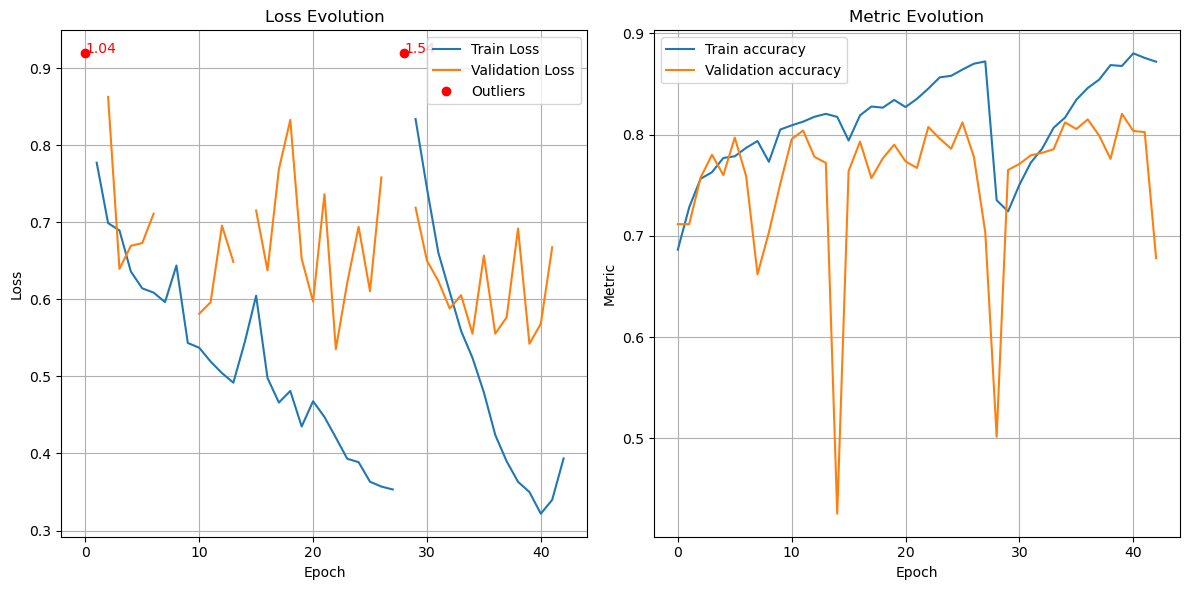

(<keras.engine.functional.Functional at 0x17ceab793d0>,
 <keras.callbacks.History at 0x17ceab79d60>)

In [4]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS),
    get_augmentation_layers)